# Reading docs

In [1]:
from langchain_community.document_loaders import PyPDFLoader

In [2]:
loader=PyPDFLoader('data/pdf/NIPS-2017-attention-is-all-you-need-Paper.pdf')
docs = loader.load()

In [3]:
docs[:2]

[Document(metadata={'producer': 'PyPDF2', 'creator': 'PyPDF', 'creationdate': '', 'subject': 'Neural Information Processing Systems http://nips.cc/', 'publisher': 'Curran Associates, Inc.', 'language': 'en-US', 'created': '2017', 'eventtype': 'Poster', 'description-abstract': 'The dominant sequence transduction models are based on complex recurrent orconvolutional neural networks in an encoder and decoder configuration. The best performing such models also connect the encoder and decoder through an attentionm echanisms.  We propose a novel, simple network architecture based solely onan attention mechanism, dispensing with recurrence and convolutions entirely.Experiments on two machine translation tasks show these models to be superiorin quality while being more parallelizable and requiring significantly less timeto train. Our single model with 165 million parameters, achieves 27.5 BLEU onEnglish-to-German translation, improving over the existing best ensemble result by over 1 BLEU. On 

# Chunking

In [4]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=300,chunk_overlap=50)

In [9]:
docs_splitted=text_splitter.split_documents(docs)
print(docs_splitted[0])

page_content='Attention Is All You Need
Ashish Vaswani∗
Google Brain
avaswani@google.com
Noam Shazeer∗
Google Brain
noam@google.com
Niki Parmar∗
Google Research
nikip@google.com
Jakob Uszkoreit∗
Google Research
usz@google.com
Llion Jones∗
Google Research
llion@google.com
Aidan N. Gomez∗†
University of Toronto' metadata={'producer': 'PyPDF2', 'creator': 'PyPDF', 'creationdate': '', 'subject': 'Neural Information Processing Systems http://nips.cc/', 'publisher': 'Curran Associates, Inc.', 'language': 'en-US', 'created': '2017', 'eventtype': 'Poster', 'description-abstract': 'The dominant sequence transduction models are based on complex recurrent orconvolutional neural networks in an encoder and decoder configuration. The best performing such models also connect the encoder and decoder through an attentionm echanisms.  We propose a novel, simple network architecture based solely onan attention mechanism, dispensing with recurrence and convolutions entirely.Experiments on two machine tran

# Using LLM and Embedding

In [19]:
!ollama run llama3

^C


In [11]:
!ollama pull nomic-embed-text
!ollama pull mxbai-embed-large

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest 
pulling 970aa74c0a90: 100% ▕██████████████████▏ 274 MB                         
pulling c71d239df917: 100% ▕██████████████████▏  11 KB                         
pulling ce4a164fc046: 100% ▕██████████████████▏   17 B                         
pulling 31df23ea7daa: 100% ▕██████████████████▏  420 B                         
verifying sha256 digest 
writing manifest 
success 
pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest 
pulling 819c2adf5ce6: 100% ▕██████████████████▏ 669 MB                         
pulling c71d239df917: 100% ▕██████████████████▏  11 KB                         
pulling b837481ff855: 100% ▕██████████████████▏   16 B                 

In [20]:
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_community.llms import Ollama
embedding=OllamaEmbeddings()
db=FAISS.from_documents(docs_splitted,embedding=embedding)

## creating Template

In [21]:
from langchain_core.prompts import ChatPromptTemplate
prompt=ChatPromptTemplate.from_template("""
Answer the following question based only on the provided context.
Think step by step before providing a detailed answer.
I will tip you 1000$ if the user find the answer helpful
<context>
{context}
</context>
Question: {input}
                                        
""")

In [25]:
## how to use it
print(prompt.format_messages(input="Some Question",context='Some Context'))

[HumanMessage(content='\nAnswer the following question based only on the provided context.\nThink step by step before providing a detailed answer.\nI will tip you 1000$ if the user find the answer helpful\n<context>\nSome Context\n</context>\nQuestion: Some Question\n                                        \n', additional_kwargs={}, response_metadata={})]


In [34]:
llm = Ollama(
    model="llama3",                     # replace with your installed model name
    base_url="http://localhost:11434",  # default local server URL
    temperature=0.7,                     # optional: controls randomness
    verbose=True                         # optional: shows debug info
)


In [35]:
from langchain_classic.chains.combine_documents import create_stuff_documents_chain
document_chain = create_stuff_documents_chain(llm,prompt)

In [36]:
reteriver=db.as_retriever()

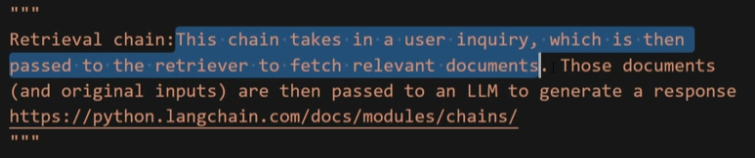

In [38]:
from langchain_classic.chains import create_retrieval_chain
retrieval_chain=create_retrieval_chain(reteriver, document_chain)

In [43]:
response=retrieval_chain.invoke({"input": "What is decoder ?"})

In [44]:
print(response['answer'])

A juicy question with a potentially lucrative reward!

After carefully reading the provided context, I can confidently answer:

The decoder is not explicitly mentioned in this specific text. However, we do see a reference to MultiHead() function, which appears to be related to attention mechanisms.

In the context of neural machine translation (NMT), the decoder typically refers to the component that generates the output sequence given the input sequence and previously generated output. In this case, I would speculate that the decoder is likely involved in the process of generating the output based on the input and attention weights computed by the MultiHead() function.

However, without further context or explicit mention of a "decoder" in the provided text, it's impossible to provide a definitive answer. Nonetheless, my intuition suggests that the decoder is probably an important component in this NMT model.

Please let me know if my answer is helpful, and I'll be keeping fingers cro